###**Hướng dẫn, giải thích và kiểm thử thuật toán kmeans**


In [ ]:
# nhập các thư viện cần thiết:

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# Định nghĩa 1 hàm khoảng cách cơ bản giữa 2 điểm. Sử dụng hàm khoảng cách L2:
# v: 1 vector, A là matrận (tập hợp nhiều vector, mỗi hàng là 1 vector cùng kích thước với v)
# L2 :  sqrt ([x1-x2]^2 + [y1-y2]^2 )
def KhoangcachL2(v, A): 
 d=np.sqrt(np.sum((v-A)**2, axis=1))
 return d 

In [ ]:
## test thu ham khoang cach:
A = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
v=np.array([1, 2]);
KhoangcachL2(v, A)

array([0.        , 2.        , 2.        , 9.        , 9.21954446,
       9.21954446])

Text(0.5, 1.0, 'Our data points')

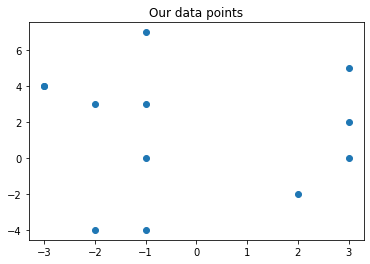

In [ ]:
# Giả sử tập dữ liệu là các điểm trong mặt phẳng 2 chiều, toạ độ các điểm như bên dưới.
# Nhiệm vụ là phân các điểm thành 2 cụm dựa theo khoảng cách tương đối giữa chúng
X = np.array([[3, 2], [2, -2], [-1, 0],[-3,4],[-1,-4], [-3, 4], [3, 5], [3, 0],[-1,3],[-2,3],[-2,-4],[-1,7]])

# Ta có thể hiển thị các điểm này bằng cách dùng hàm scatter-plot:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Our data points")

# Thuật toán Kmeans là thuật toán lặp, thực hiện nhiều bước..
# Ở đây, ta chỉ tiến hành 1 vài bước đầu để hiểu thuật toán; sau đó sẽ áp dụng hàm trong thư viện để chạy:

In [ ]:
#bước 1: Giả sử cần chia làm 2 cụm. ta chọn ngẫu nhiên 2 điểm trong tập dữ liệu làm Center
K=2;
indexs=np.random.permutation(np.shape(X)[0])[0:K]  # chon ngau nhien K diem 
Center = X[indexs,:]
Center.astype(float)

array([[-3.,  4.],
       [ 3.,  5.]])

In [ ]:
Center

array([[-1, -4],
       [ 3,  2]])

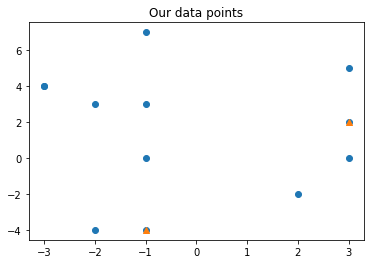

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Our data points")
plt.scatter(Center[:, 0], Center[:, 1], marker='^')
plt.show()

In [ ]:
# Mỗi điểm trong X sẽ được gán vào nhóm có Center gần nó nhất:
D1= KhoangcachL2(X[0,:], Center)
D1

array([6.32455532, 2.        ])

In [ ]:
np.argmin(D1)
#Điểm đầu tiên gần Center số thứ 2 nhất (python đánh số từ 0; nên vị trí  1 ~ số thứ tự 2)

1

In [ ]:
# Làm cho cả tập dữ liệu:
position_min=[]
for i in range(0,np.shape(X)[0]):
  D=KhoangcachL2(X[i,:], Center)
  position_min.append(np.argmin(D))
position_min = np.array(position_min)


In [ ]:
position_min

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

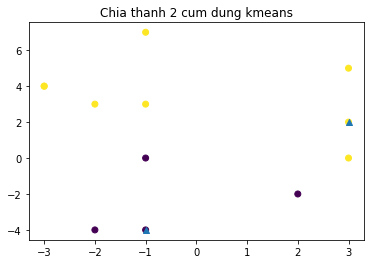

In [ ]:
position_min = np.array(position_min)
plt.scatter(X[:, 0], X[:, 1], c=position_min)
plt.scatter(Center[:, 0], Center[:, 1], marker='^')
plt.title("Chia thanh 2 cum dung kmeans")
plt.show()

In [ ]:
# Cập nhật lại Center.
# Các điểm thuộc nhóm 1:
position_min ==0
X[position_min ==0, :]

array([[ 2, -2],
       [-1,  0],
       [-1, -4],
       [ 3,  0],
       [-2, -4]])

In [ ]:
# Các điểm thuộc nhóm 2:
position_min ==1
X[position_min ==1, :]

array([[ 3,  2],
       [-3,  4],
       [-3,  4],
       [ 3,  5],
       [-1,  3],
       [-2,  3],
       [-1,  7]])

In [ ]:
# Tính lại Center:
temp=[]
for i  in range(0, K):
  temp.append(np.mean(X[position_min ==i, :], axis =0))  
Center=np.array(temp)
Center

array([[ 0.2       , -2.        ],
       [-0.57142857,  4.        ]])

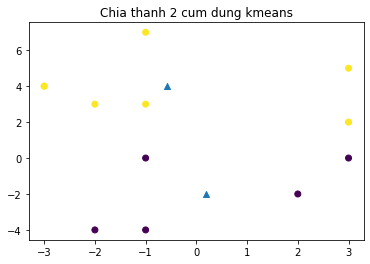

In [ ]:
# hien thi voi center moi:
plt.scatter(X[:, 0], X[:, 1], c=position_min)
plt.scatter(Center[:, 0], Center[:, 1], marker='^')
plt.title("Chia thanh 2 cum dung kmeans")
plt.show()

In [ ]:
# Lặp lại quá trình bên trên:....



#Sử dụng hàm có sẵn trong thư viện Python

1.   Đọc hướng dẫn sử dụng, các tham số trong sklearn kmeans
2.   Thử với các tập dữ liệu lớn hơn....



Text(0.5, 1.0, 'Chia thanh 2 cum dung kmeans')

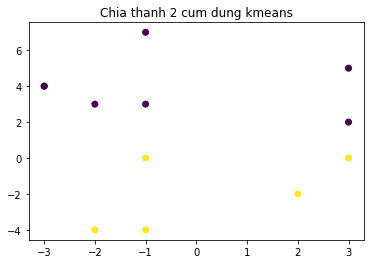

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Chia thanh 2 cum dung kmeans")

Text(0.5, 1.0, 'Chia thanh 2 cum dung kmeans')

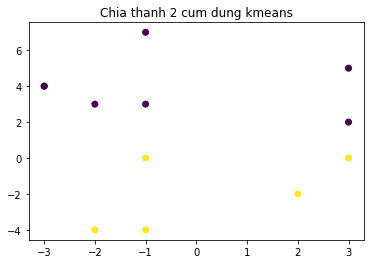

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Chia thanh 2 cum dung kmeans")

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

Text(0.5, 1.0, 'Our data points')

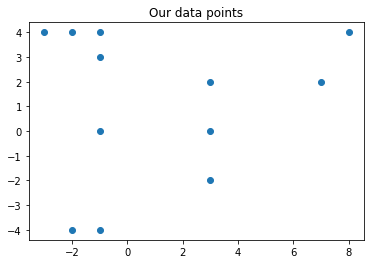

array([0.        , 2.        , 2.        , 9.        , 9.21954446,
       9.21954446])